In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Tiles

This is a dataset of otter skull morphology.

In [2]:
# uncomment the following:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
     gather(characteristic, value, -species, -museum, -accession)

otter.data %>% head

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


Make a bar chart of the museum column. What is this chart telling you?

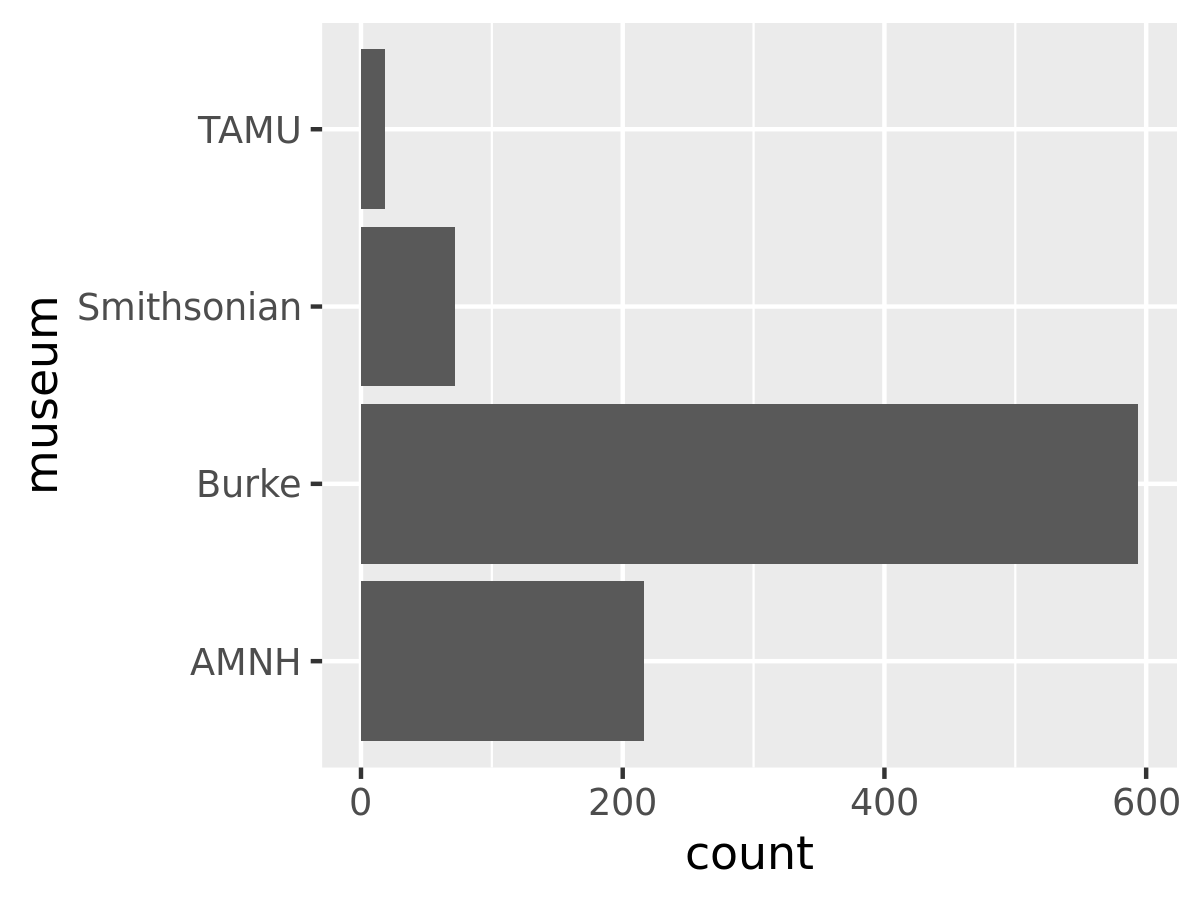

In [4]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

p = ggplot(otter.data, aes(y=museum)) +
    geom_bar()

p

Make a heatmap of the data with `characteristic` on the x-axis and `species` on the y-axis.

In [5]:
# uncomment this to get a scaled version of the data:

otter.data.scaled = otter.data %>%
    group_by(characteristic) %>%
    mutate(value.scaled = scales::rescale(value))

otter.data.scaled %>% head

species,museum,accession,characteristic,value,value.scaled
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A. cinerea,AMNH,101458,m1,15.100,0.27867699
A. cinerea,AMNH,101461,m1,12.740,0.11259676
A. cinerea,AMNH,101466,m1,12.425,0.09042928
A. cinerea,AMNH,101635,m1,13.400,0.15904293
A. cinerea,AMNH,101459,m1,14.400,0.22941590
A. cinerea,AMNH,101462,m1,14.525,0.23821253


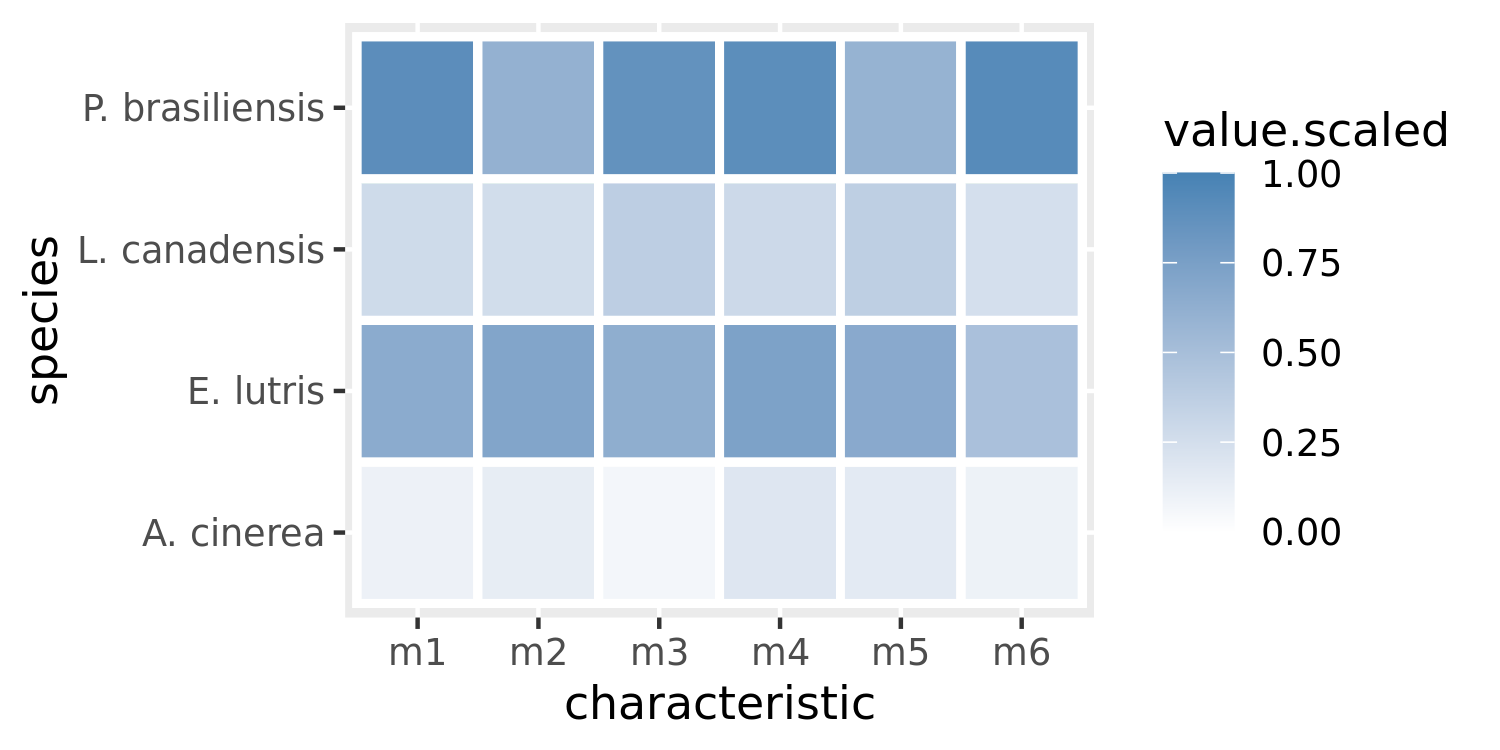

In [25]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

p2 = ggplot(otter.data.scaled, aes(x=characteristic, y=species, fill = value.scaled)) +
    geom_tile(color = 'white', linewidth = 1) +
    scale_fill_gradient(low = "white", high = "steelblue")

p2

What can you do to make the chart more visually appealing?
- make the `color` white
- use `scale_fill_gradient(low = "white", high = "steelblue")`

In [29]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

p5 = ggplot(otter.data.scaled, aes(x=characteristic, y=species, fill = value.scaled)) +
    geom_tile(color = 'white', linewidth = 1) +
    scale_fill_viridis(option="A") +
    theme_minimal()

p5

ERROR: Error in scale_fill_viridis(option = "A"): could not find function "scale_fill_viridis"


# Points with jitter

Let's stick with the otter data. We could also use a point+jitter plot to represent the data. Make a point+jitter plot below with species on the x-axis, value on the y-axis, and facet the chart by characteristic. 

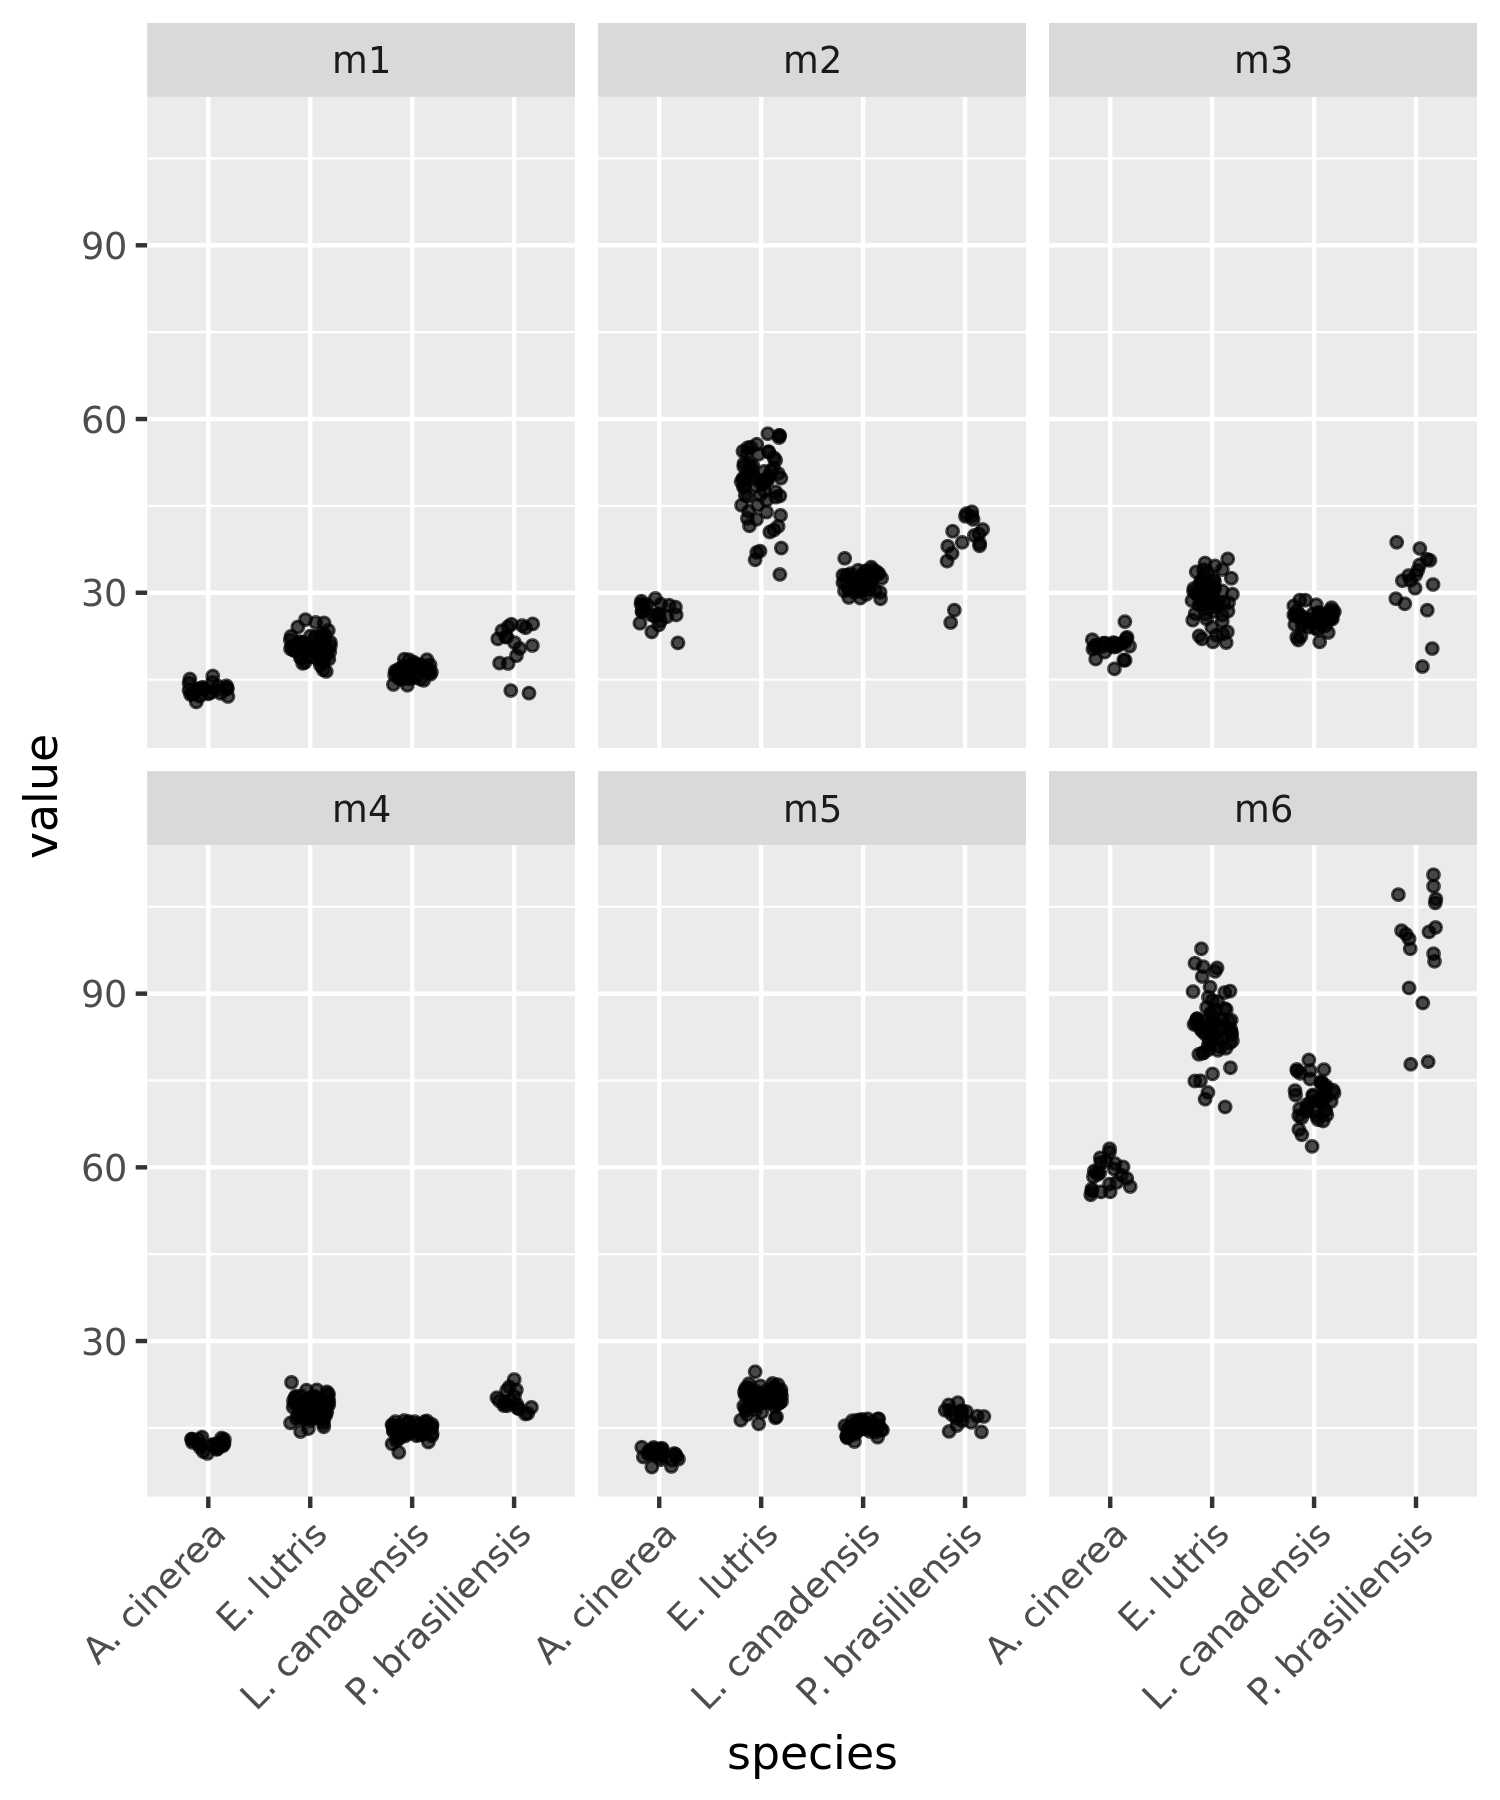

In [34]:
options(repr.plot.width=5, repr.plot.height=6, repr.plot.res = 300)

p3 = ggplot(otter.data.scaled, aes(x = species, y = value)) +
    geom_point(na.rm = TRUE,
               position = position_jitter(h = 0, w = 0.2), size = 1, alpha = 0.7) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    facet_wrap(~characteristic)

p3

Make the axis test legible by rotating the text 45 degrees.

What happens if you pass the argument `scales='free_y` to `facet_wrap`?

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


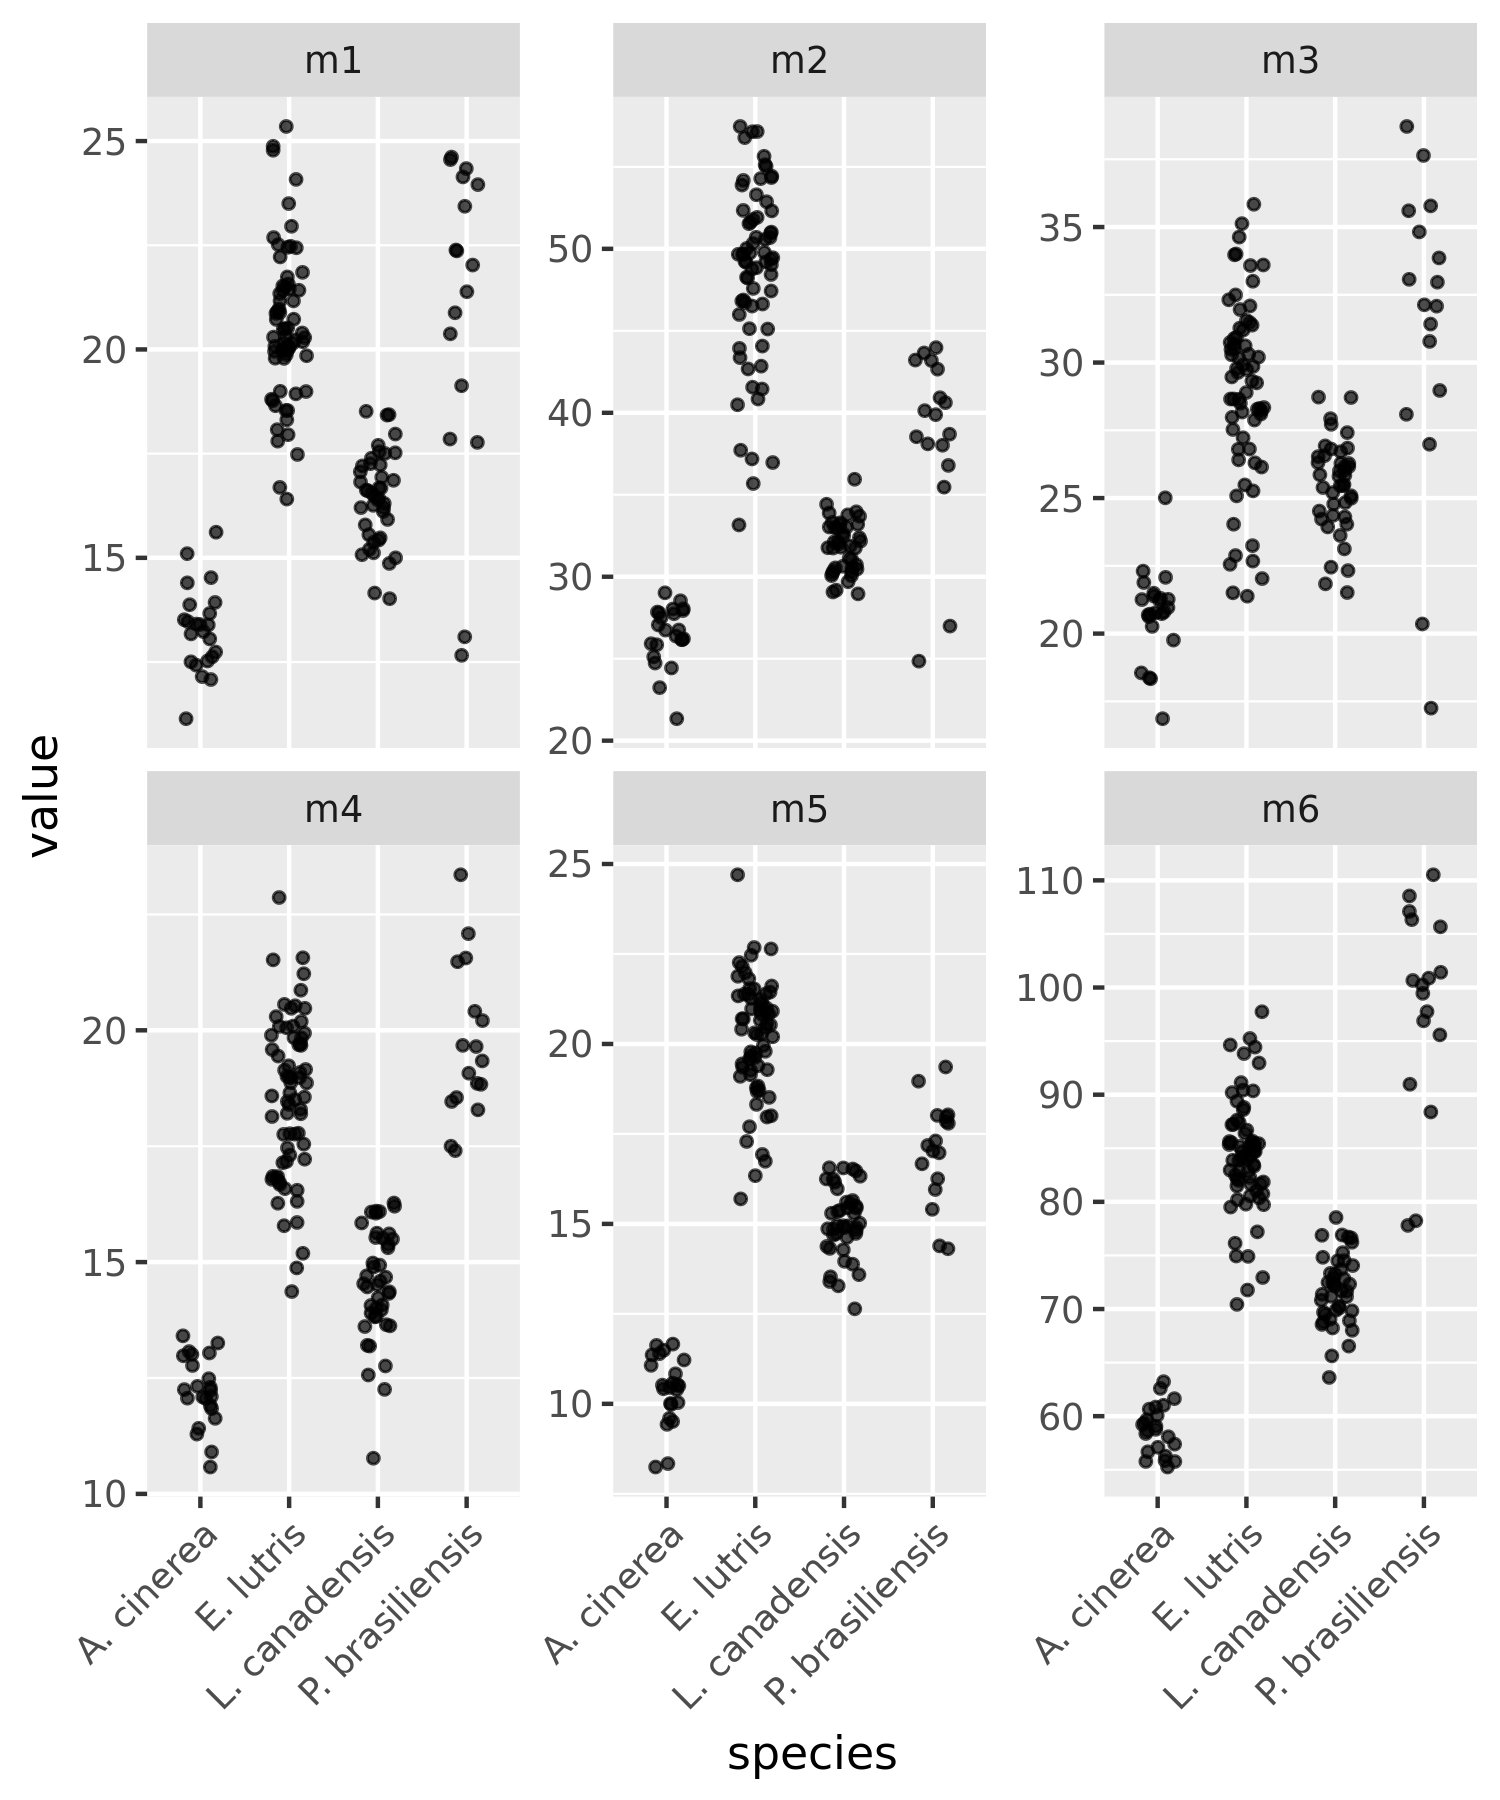

In [33]:
p4 = p3 + facet_wrap(~characteristic, scales = 'free_y')

p4

Do you prefer the heatmap or the point+jitter plot?